In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 13})

In [40]:
thresholds = [0.05,0.10,0.15,0.20,0.25,0.30,0.35]
colors = ['b','g','r','c','y','m','k']
hatches = ['/','*', 'o', 'O', '.','--', '+']

In [41]:
def get_means_stds(string, thresholds):
    means = []
    stds = []
    nan_flags = []
    for thresh in thresholds:
        test_string = "F-score @ threshold " + str(thresh)
        line_detection = [test_string in i for i in string]
        detection_index = line_detection.index(True)
        if 'NAN' in string[detection_index]:
            nan_flags.append(True)
        else:
            nan_flags.append(False)
        data_line = string[detection_index+1].split('Mean: ')[-1]
        mean = float(data_line[:5])
        std = float(data_line[-5:])
        means.append(mean)
        stds.append(std)
    return thresholds, means, stds, nan_flags

In [42]:
def plot_lines(title, thresholds, means, stds, nan_flags,color,hatch):
    thresholds, means, stds, nan_flags = np.array(thresholds), np.array(means), np.array(stds), np.array(nan_flags)
    plt.plot(thresholds,means,label=title,color=color)
#     plt.errorbar(thresholds,means, stds,color=color)
#     for ii in range(len(nan_flags)):
#         if nan_flags[ii]:
#             plt.scatter(thresholds[ii],means[ii],s=200,marker='x', color=color)
#     plt.fill_between(thresholds, means-stds,means+stds,alpha=.25,color=color,hatch=hatch)
    plt.xlabel('Threshold')
    plt.ylabel('F-Score')
    

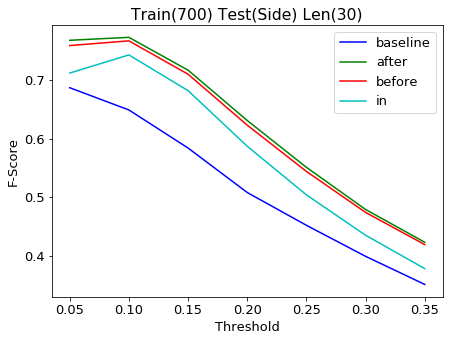

In [43]:
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/baseline/len30/train_lobby_700/eval/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/radar/len30/train_lobby_700/eval/after/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/radar/len30/train_lobby_700/eval/before/CSL_lobby_side_0/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/radar/len30/train_lobby_700/eval/in/CSL_lobby_side_0/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

plt.figure(figsize=(7,5))
for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plt.legend()
# plt.ylim([.6,.75])
plt.title('Train(700) Test(Side) Len(30)')
# plt.tight_layout()
plt.show()

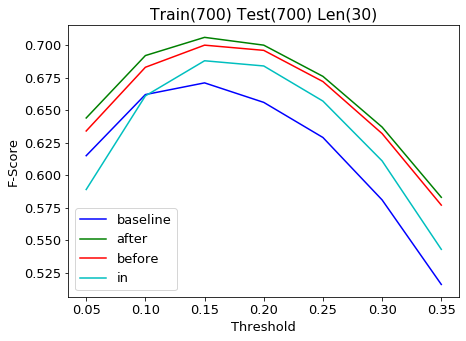

In [46]:
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/baseline/len30/train_lobby_700/eval/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/radar/len30/train_lobby_700/eval/after/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/radar/len30/train_lobby_700/eval/before/CSL_lobby_700/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/radar/len30/train_lobby_700/eval/in/CSL_lobby_700/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

plt.figure(figsize=(7,5))
for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plt.legend()
# plt.ylim([.6,.75])
plt.title('Train(700) Test(700) Len(30)')
# plt.tight_layout()
plt.show()

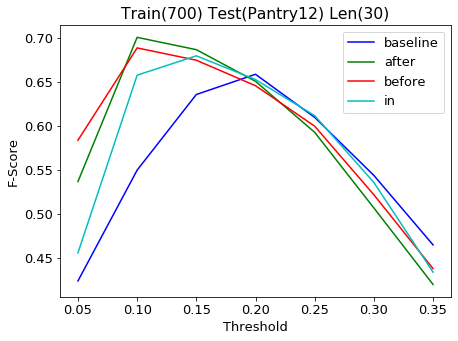

In [48]:
results_file_list = ['/home/spencer/research/radar-rgb-bfs/NN/runs/baseline/len30/train_side/eval/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/radar/len30/train_side/eval/after/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/radar/len30/train_side/eval/before/pantry_12/f-score.txt',
                     '/home/spencer/research/radar-rgb-bfs/NN/runs/radar/len30/train_side/eval/in/pantry_12/f-score.txt']               
results_file_titles = ['baseline','after','before','in']

plt.figure(figsize=(7,5))
for ii in range(4):
    
    results_file = open(results_file_list[ii],"r")
    string_input = results_file.read()
    results_file.close()
    list_input = string_input.splitlines()
    thresholds, means, stds, nan_flags = get_means_stds(list_input, thresholds)
    plot_lines(results_file_titles[ii],thresholds, means, stds, nan_flags, color=colors[ii],hatch='/')
plt.legend()
# plt.ylim([.6,.75])
plt.title('Train(700) Test(Pantry12) Len(30)')
# plt.tight_layout()
plt.show()